#**Limpieza de datos**
## Presentado por:
*   Alejandro Monsalve Vizcaíno
*   Isabella Preciado Martinez
*   Julian Camilo Erazo


##**Introducción**

 Las enfermedades cardiovasculares (CVD, por sus siglas en inglés) son una de las principales causas de muerte a nivel mundial, afectando a millones de personas cada año. La prevención y detección temprana son clave para reducir la mortalidad y morbilidad asociadas con estas enfermedades. Sin embargo, identificar a los individuos en riesgo de desarrollar CVD sigue siendo un desafío, especialmente debido a la complejidad y la diversidad de los factores de riesgo involucrados. Nuestro proyecto tiene como objetivo desarrollar un modelo de aprendizaje automático que prediga el riesgo de CVD utilizando factores de estilo de vida y salud personal, como el estado general de salud, la actividad física, el historial de fumar y el consumo de alimentos, basándome en el conjunto de datos de la Encuesta del Sistema de Vigilancia de Factores de Riesgo del Comportamiento (BRFSS).

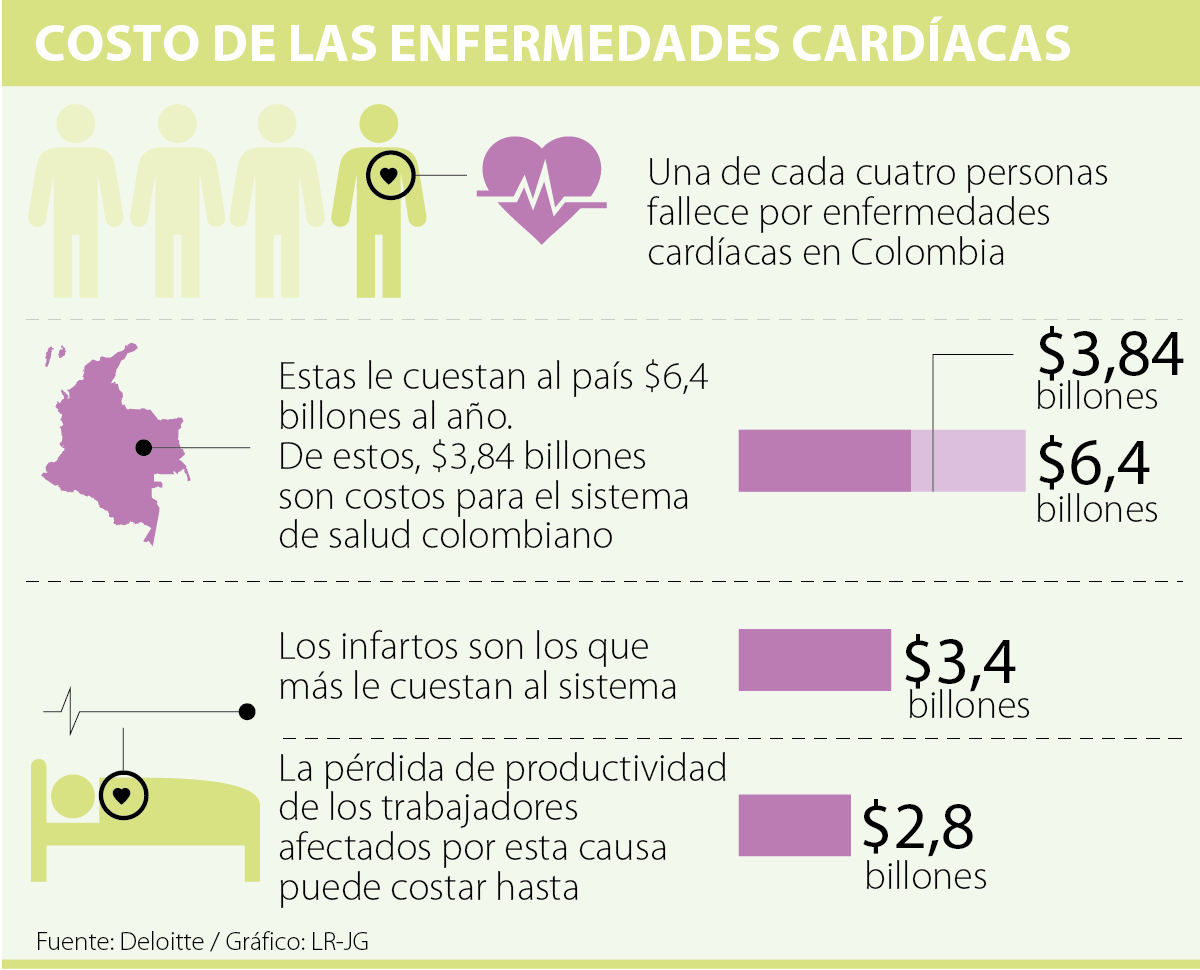

La predicción precisa del riesgo de CVD permite intervenciones preventivas personalizadas que pueden salvar vidas y reducir los costos del sistema de salud. Al enfocarse en factores de estilo de vida, este modelo tiene el potencial de empoderar tanto a los pacientes como a los profesionales de la salud para tomar decisiones informadas sobre la prevención. Además, el enfoque en la intersección entre la inteligencia artificial y la salud pública puede ayudar a desmitificar el uso de tecnologías avanzadas en la medicina preventiva, promoviendo su integración en la práctica clínica diaria.

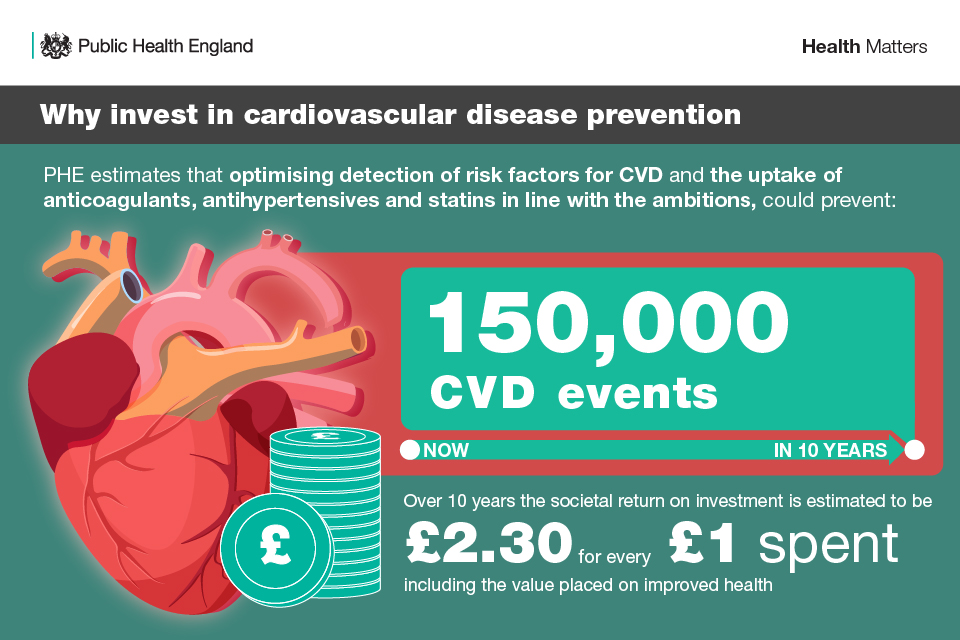

### **Factores de Riesgo:**
Los factores de riesgo de las ECV son múltiples y a menudo interactúan entre sí, aumentando significativamente el riesgo de desarrollar la enfermedad. Estos factores pueden clasificarse en modificables y no modificables:

*   **Factores no modificables:** Incluyen la edad, el sexo, y la historia familiar de ECV. A medida que una persona envejece, el riesgo de ECV aumenta. Los hombres también tienen un mayor riesgo que las mujeres, aunque este riesgo se iguala después de la menopausia.

*   **Factores modificables:** Incluyen la hipertensión arterial, dislipidemia (niveles elevados de colesterol y triglicéridos), tabaquismo, obesidad, inactividad física, diabetes mellitus, y una dieta poco saludable. Estos factores pueden ser gestionados mediante cambios en el estilo de vida y, en algunos casos, con medicación.

Los estudios han demostrado que la combinación de varios factores de riesgo puede aumentar exponencialmente la probabilidad de desarrollar una ECV. Por ejemplo, un individuo que fuma tiene hipertensión y es obeso, enfrenta un riesgo mucho mayor que alguien que solo tiene uno de estos factores.


 ## Dataset explanation

 El conjunto de datos utilizado en este proyecto proviene de un estudio de predicción del riesgo de enfermedades cardiovasculares (CVD). Este dataset contiene una amplia variedad de variables que reflejan factores de estilo de vida, historial médico, y características demográficas de los individuos, lo que permite una evaluación integral del riesgo de CVD. Los datos han sido preprocesados para garantizar su limpieza y relevancia para el análisis predictivo.

El conjunto de datos consta de 19 variables y 308,854 registros. Estas variables incluyen información demográfica como el sexo y la categoría de edad, así como indicadores de salud como el estado general de salud, el historial de chequeos médicos, y la presencia de diabetes. Cada variable se seleccionó cuidadosamente por su relevancia en la evaluación del riesgo de enfermedades cardiovasculares.

####**Lista de Variables del Dataset:**

1. **General_Health**: Estado general de salud (ordinal: de "Poor" a "Excellent").

2. **Checkup**: Tiempo desde la última visita al médico para un chequeo rutinario (ordinal).

3. **Exercise**: Participación en actividades físicas (binario: True/False).

4. **Heart_Disease**: Diagnóstico de enfermedad cardíaca coronaria o infarto (binario: True/False).

5. **Skin_Cancer**: Diagnóstico de cáncer de piel (binario: True/False).

6. **Other_Cancer**: Diagnóstico de otros tipos de cáncer (binario: True/False).

7. **Depression**: Diagnóstico de trastorno depresivo (binario: True/False).

8. **Diabetes**: Presencia de diabetes o pre-diabetes, con opciones adicionales como diagnóstico durante el embarazo (categórico).

9. **Arthritis**: Diagnóstico de artritis (binario: True/False).

10. **Sex**: Género del encuestado (binario: Female/Male).

11. **Age_Category**: Categorías de edad en rangos (ordinal: de "18-24" a "80+").

12. **Height (cm)**: Altura del encuestado en centímetros (numérico).

13. **Weight (kg)**: Peso del encuestado en kilogramos (numérico).

14. **BMI**: Índice de Masa Corporal calculado (numérico).

15. **Smoking_History**: Historial de tabaquismo (binario: True/False).

16. **Alcohol_Consumption**: Cantidad de consumo de alcohol en el último mes (numérico).

17. **Fruit_Consumption**: Frecuencia de consumo de frutas (numérico).

18. **Green_Vegetables_Consumption**: Frecuencia de consumo de vegetales verdes (numérico).

19. **FriedPotato_Consumption**: Frecuencia de consumo de papas fritas (numérico).

## Carga de datos:

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

{}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d alphiree/cardiovascular-diseases-risk-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset
License(s): CC0-1.0
  0% 0.00/4.87M [00:00<?, ?B/s]
100% 4.87M/4.87M [00:00<00:00, 67.1MB/s]


In [ ]:
!unzip cardiovascular-diseases-risk-prediction-dataset.zip

Archive:  cardiovascular-diseases-risk-prediction-dataset.zip
  inflating: CVD_cleaned.csv         


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('CVD_cleaned.csv')

# Vista previa del dataset
print(df.head())

  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  

In [ ]:
df

General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No         No   
2               No           No         No   
3               No           No         No   
4               No           No         No   
...            ...          ...        ...   
308849          No           No         No   
308850          No           No         No   
308851          No           No        Yes   
308852          No           No         No   
308853          No           No         No   

                                          Diabetes Arthritis     Sex  \
0                                               No       Yes  Female   
1                                              Yes        No  Female   
2                                              Yes        No  Female   
3                                              Yes        No    Male   
4                                               No        No    Male   
...                                            ...       ...     ...   
308849                                          No        No    Male   
308850                                         Yes        No    Male   
308851  Yes, but female told only during pregnancy        No  Female   
308852                                          No        No    Male   
308853                                          No        No  Female   

       Age_Category  Height_(cm)  Weight_(kg)    BMI Smoking_History  \
0             70-74        150.0        32.66  14.54             Yes   
1             70-74        165.0        77.11  28.29              No   
2             60-64        163.0        88.45  33.47              No   
3             75-79        180.0        93.44  28.73              No   
4               80+        191.0        88.45  24.37             Yes   
...             ...          ...          ...    ...             ...   
308849        25-29        168.0        81.65  29.05              No   
308850        65-69        180.0        69.85  21.48              No   
308851        30-34        157.0        61.23  24.69             Yes   
308852        65-69        183.0        79.38  23.73              No   
308853        45-49        160.0        81.19  31.71              No   

        Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  \
0                       0.0               30.0                          16.0   
1                       0.0               30.0                           0.0   
2                       4.0               12.0                           3.0   
3                       0.0               30.0                          30.0   
4                       0.0                8.0                           4.0   
...                     ...                ...                           ...   
308849                  4.0               30.0                           8.0   
308850                  8.0               15.0                          60.0   
308851                  4.0               40.0                           8.0   
308852                  3.0               30.0 

## **Procesamiento de los datos**:

**Mostrar la información del dataset**

In [ ]:
print("Número de columnas:", df.shape[1])
print("Número de Datos:", df.shape[0])

Número de columnas: 19
Número de Datos: 308854


**Verificación de tipos de datos**

In [ ]:
print(df.dtypes)

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object


**Transformación de tipo de datos**

In [ ]:
# Convertir columnas de tipo 'object' a 'category' para mejorarar el rendimiento y hacer que el análisis sea más eficiente
categorical_columns = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease',
                       'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes',
                       'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

df[categorical_columns] = df[categorical_columns].astype('category')

In [ ]:
print(df.dtypes)

General_Health                  category
Checkup                         category
Exercise                        category
Heart_Disease                   category
Skin_Cancer                     category
Other_Cancer                    category
Depression                      category
Diabetes                        category
Arthritis                       category
Sex                             category
Age_Category                    category
Height_(cm)                      float64
Weight_(kg)                      float64
BMI                              float64
Smoking_History                 category
Alcohol_Consumption              float64
Fruit_Consumption                float64
Green_Vegetables_Consumption     float64
FriedPotato_Consumption          float64
dtype: object


**Transformación de los datos**

In [ ]:
# Aplicar la estandarización (minúsculas y quitar espacios) a cada columna categórica
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.lower().str.strip())

In [ ]:
df

General_Health                  Checkup Exercise Heart_Disease  \
0                poor  within the past 2 years       no            no   
1           very good     within the past year       no           yes   
2           very good     within the past year      yes            no   
3                poor     within the past year      yes           yes   
4                good     within the past year       no            no   
...               ...                      ...      ...           ...   
308849      very good     within the past year      yes            no   
308850           fair  within the past 5 years      yes            no   
308851      very good      5 or more years ago      yes            no   
308852      very good     within the past year      yes            no   
308853      excellent     within the past year      yes            no   

       Skin_Cancer Other_Cancer Depression  \
0               no           no         no   
1               no           no         no   
2               no           no         no   
3               no           no         no   
4               no           no         no   
...            ...          ...        ...   
308849          no           no         no   
308850          no           no         no   
308851          no           no        yes   
308852          no           no         no   
308853          no           no         no   

                                          Diabetes Arthritis     Sex  \
0                                               no       yes  female   
1                                              yes        no  female   
2                                              yes        no  female   
3                                              yes        no    male   
4                                               no        no    male   
...                                            ...       ...     ...   
308849                                          no        no    male   
308850                                         yes        no    male   
308851  yes, but female told only during pregnancy        no  female   
308852                                          no        no    male   
308853                                          no        no  female   

       Age_Category  Height_(cm)  Weight_(kg)    BMI Smoking_History  \
0             70-74        150.0        32.66  14.54             yes   
1             70-74        165.0        77.11  28.29              no   
2             60-64        163.0        88.45  33.47              no   
3             75-79        180.0        93.44  28.73              no   
4               80+        191.0        88.45  24.37             yes   
...             ...          ...          ...    ...             ...   
308849        25-29        168.0        81.65  29.05              no   
308850        65-69        180.0        69.85  21.48              no   
308851        30-34        157.0        61.23  24.69             yes   
308852        65-69        183.0        79.38  23.73              no   
308853        45-49        160.0        81.19  31.71              no   

        Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  \
0                       0.0               30.0                          16.0   
1                       0.0               30.0                           0.0   
2                       4.0               12.0                           3.0   
3                       0.0               30.0                          30.0   
4                       0.0                8.0                           4.0   
...                     ...                ...                           ...   
308849                  4.0               30.0                           8.0   
308850                  8.0               15.0                          60.0   
308851                  4.0               40.0                           8.0   
308852                  3.0               30.0 

In [ ]:
# Reemplazamos valores negativos en las variables numéricas (que no deben tener negativos) por NaN

non_negative_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

df[non_negative_columns] = df[non_negative_columns].mask(df[non_negative_columns] < 0)

### **Revisión y eliminación de outliers**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

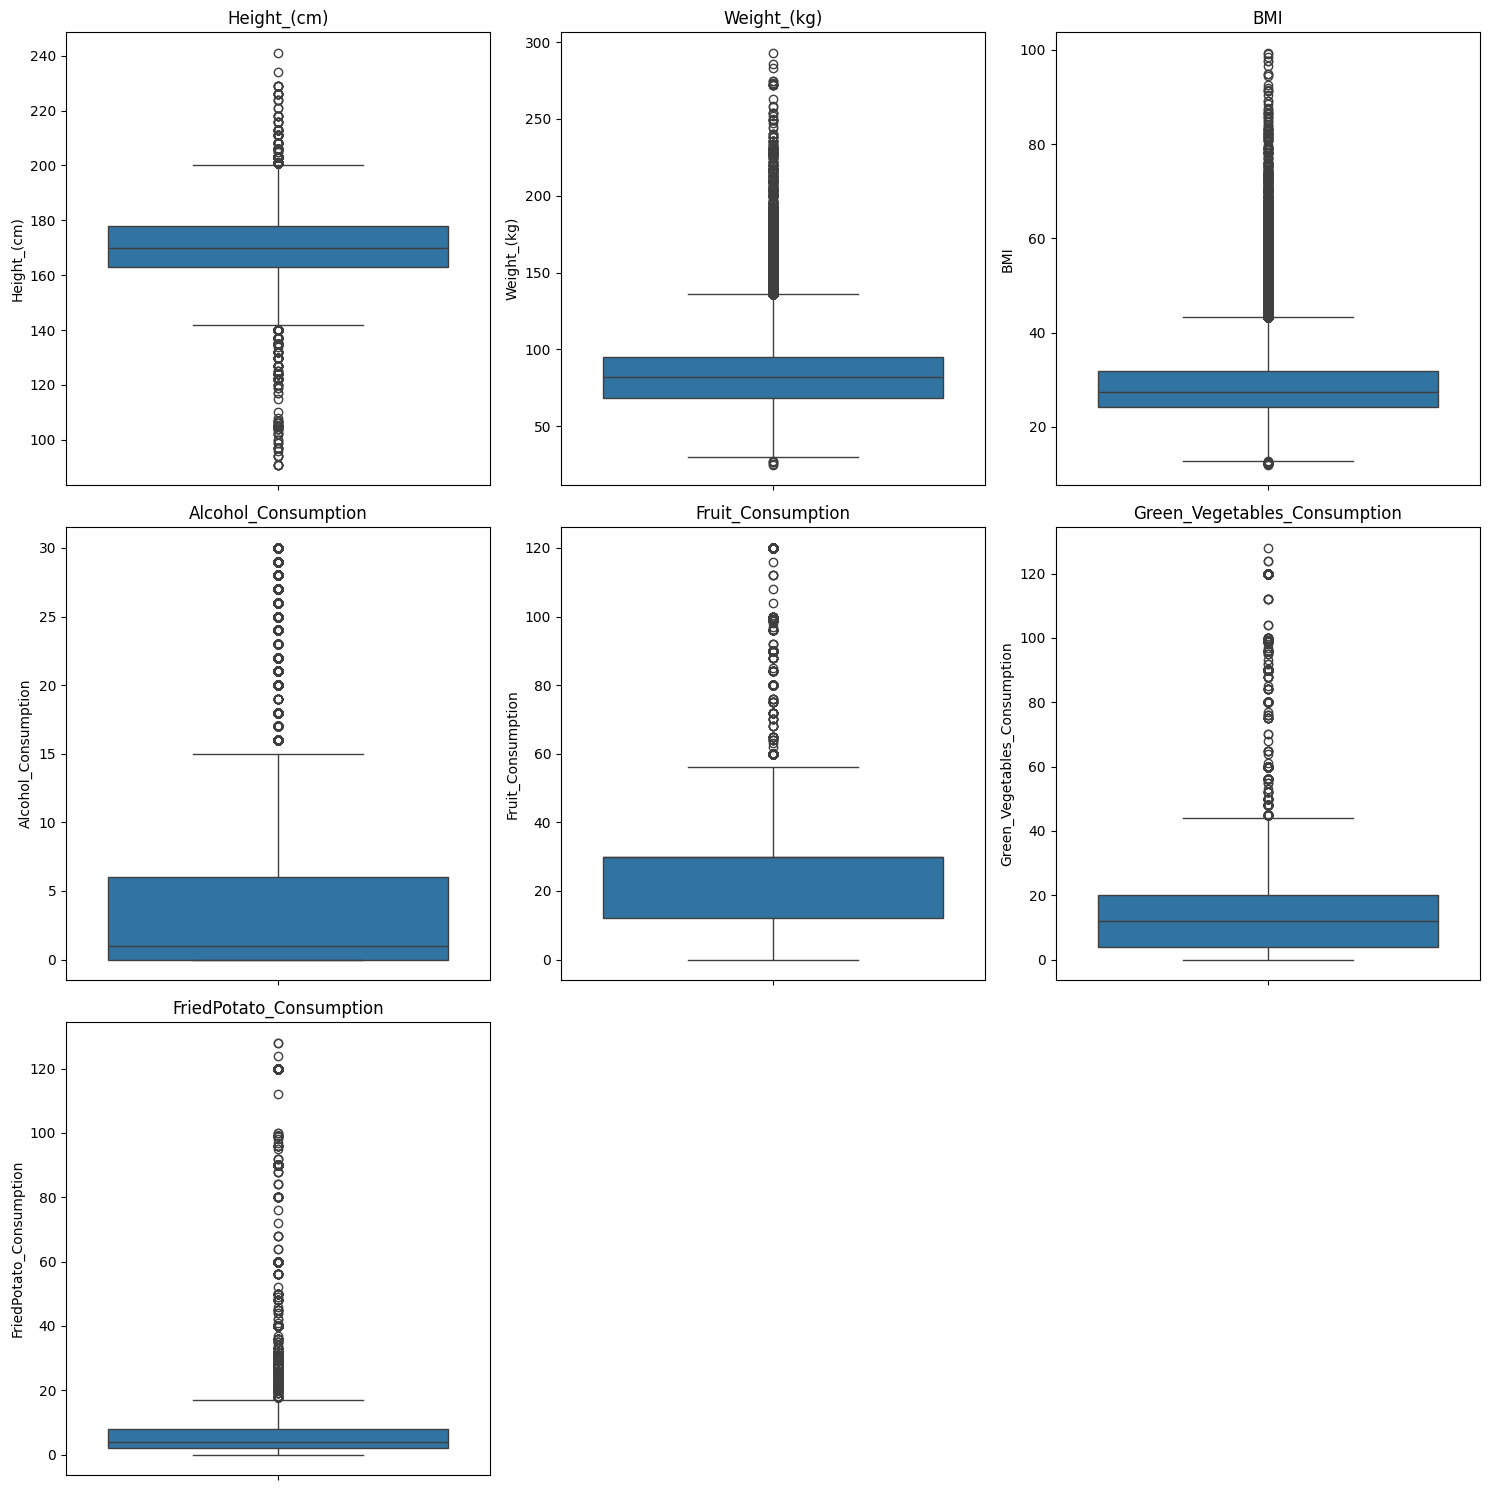

In [ ]:
num_columns = df.select_dtypes(include=[np.number]).columns  # Filtrar solo columnas numéricas
n_cols = 3  # Número de columnas en la grilla de gráficos
n_rows = (len(num_columns) + n_cols - 1) // n_cols  # Calcula cuántas filas necesitas

plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Ajusta el tamaño de la figura según el número de subplots

for index, column in enumerate(num_columns):
    plt.subplot(n_rows, n_cols, index + 1)  # Crea un subplot para cada columna
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [ ]:
# Seleccionamos las columnas numéricas
num_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Eliminamos valores atípicos en cada columna numérica
for column in num_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR  # Usamos el multiplicador estándar 1.5
    upper_bound = Q3 + 3 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Datos después de eliminar outliers:")
print(df.shape)

Datos después de eliminar outliers:
(256341, 19)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

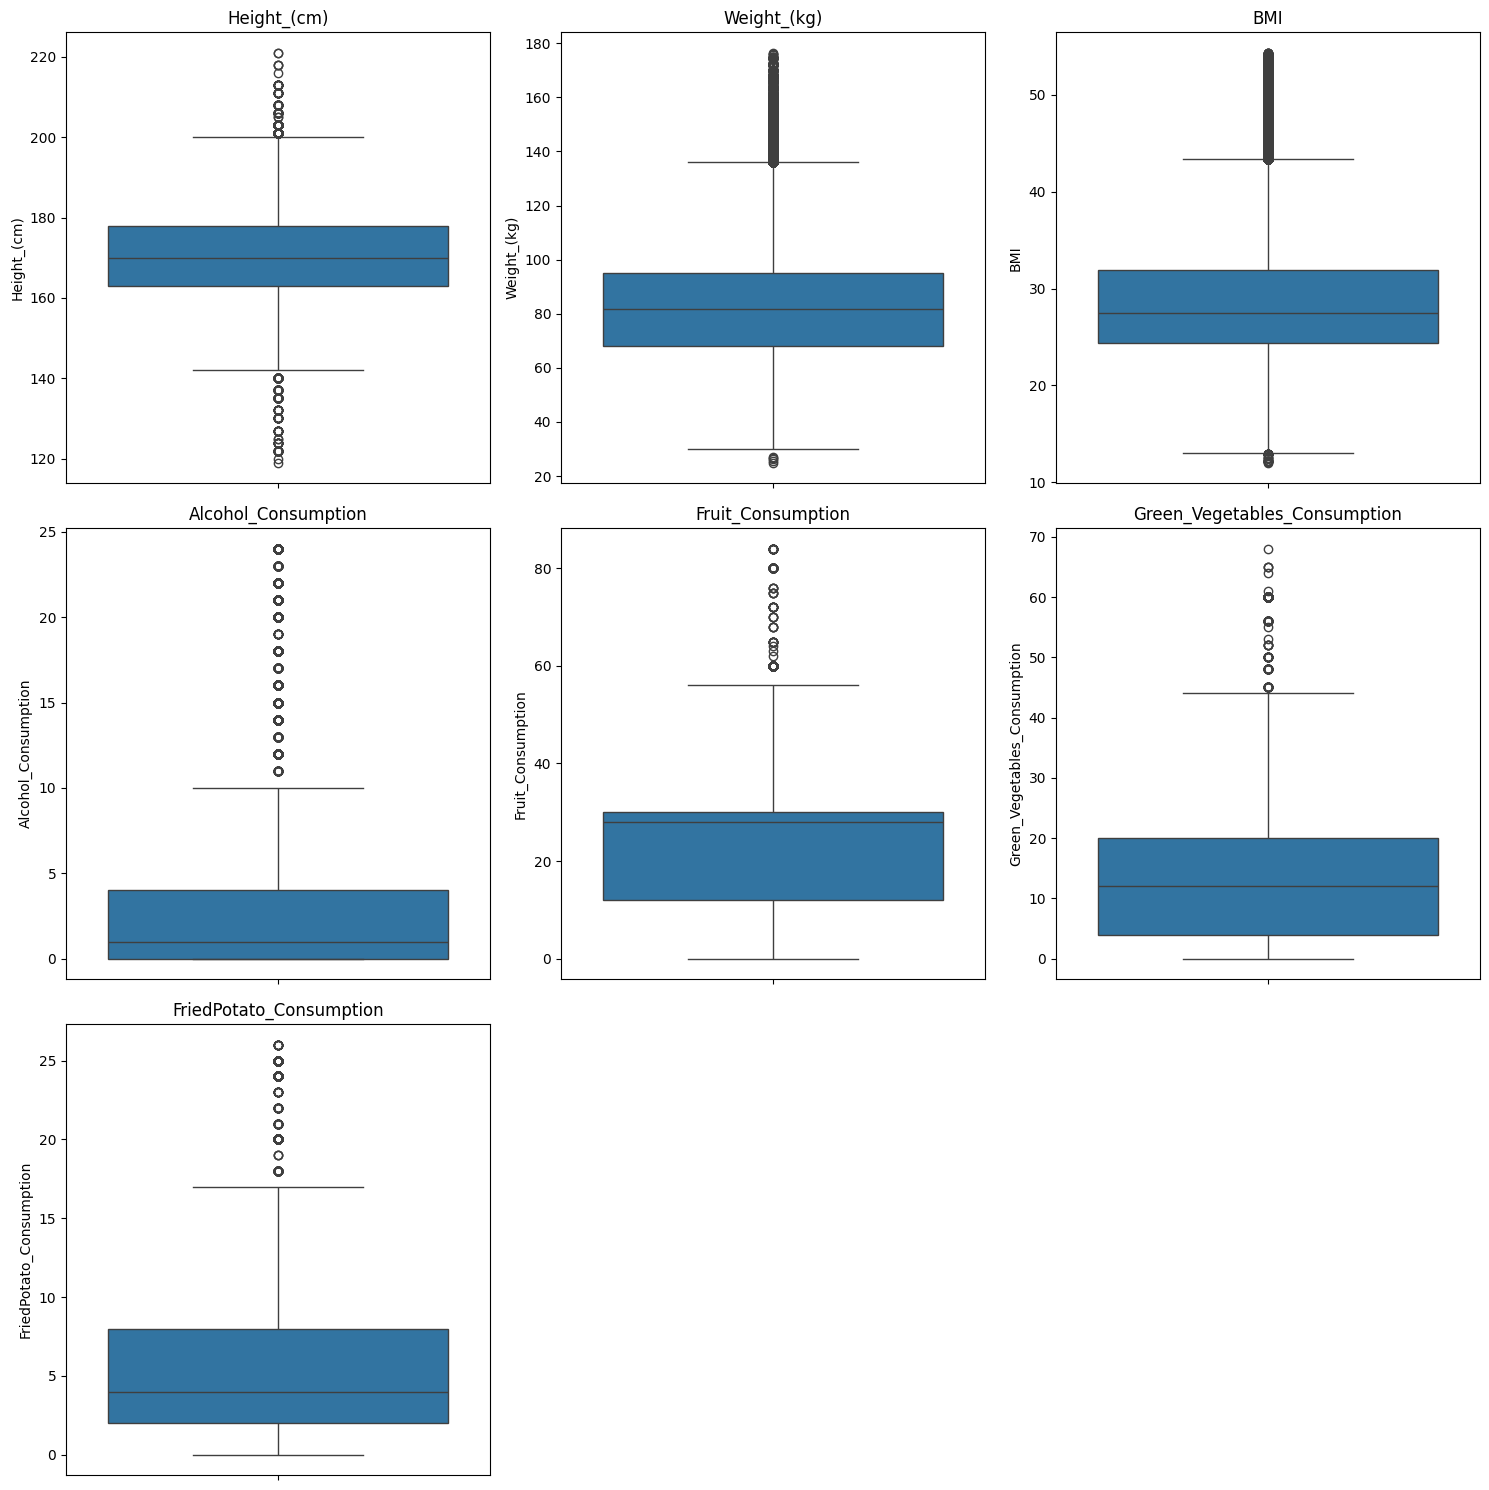

In [ ]:
n_cols = 3  # Número de columnas en la grilla de gráficos
n_rows = (len(num_columns) + n_cols - 1) // n_cols  # Calcula cuántas filas necesitas

plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Ajusta el tamaño de la figura según el número de subplots

for index, column in enumerate(num_columns):
    plt.subplot(n_rows, n_cols, index + 1)  # Crea un subplot para cada columna
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

### **Revisión de filas duplicadas**

In [ ]:
duplicate_rows_df = df[df.duplicated()]

print("Total de registros en la tabla:", len(df))
print("Filas duplicadas: ", duplicate_rows_df.shape[0])
print("porcentaje de duplicados: ", duplicate_rows_df.shape[0] / len(df) * 100, '%')

Total de registros en la tabla: 308854
Filas duplicadas:  80
porcentaje de duplicados:  0.025902206220414822 %


In [ ]:
# Eliminamos filas duplicadas
df = df.drop_duplicates()

### **Revisión de datos faltantes**

In [ ]:
print(df.isnull().sum())

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


### **Generación de datos faltantes**

In [ ]:
# Copiamos el DataFrame original para no modificarlo
df_missing = df.copy()

# Especificamos el porcentaje de datos faltantes que queremos introducir
porcentaje_nan = 0.1
num_filas = df_missing.shape[0]
num_nan = int(num_filas * porcentaje_nan)

# Seleccionamos índices aleatorios para introducir NaN en la columna 'Fruit_Consumption'
np.random.seed(42)
indices_nan = np.random.choice(df_missing.index, size=num_nan, replace=False)
df_missing.loc[indices_nan, 'Fruit_Consumption'] = np.nan

In [ ]:
# Especificamos el porcentaje de datos faltantes que queremos introducir
porcentaje_nan = 0.23
num_filas = df_missing.shape[0]
num_nan = int(num_filas * porcentaje_nan)

# Seleccionamos índices aleatorios para introducir NaN en la columna 'General_Health'
np.random.seed(48)
indices_nan = np.random.choice(df_missing.index, size=num_nan, replace=False)
df_missing.loc[indices_nan, 'General_Health'] = np.nan

In [ ]:
# Especificamos el porcentaje de datos faltantes que queremos introducir
porcentaje_nan = 0.08
num_filas = df_missing.shape[0]
num_nan = int(num_filas * porcentaje_nan)

# Seleccionamos índices aleatorios para introducir NaN en la columna 'Weight_(kg)'
np.random.seed(48)
indices_nan = np.random.choice(df_missing.index, size=num_nan, replace=False)
df_missing.loc[indices_nan, 'Weight_(kg)'] = np.nan

In [ ]:
# Verificamos la introducción de valores faltantes
print(df_missing.isnull().sum())

General_Health                  58940
Checkup                             0
Exercise                            0
Heart_Disease                       0
Skin_Cancer                         0
Other_Cancer                        0
Depression                          0
Diabetes                            0
Arthritis                           0
Sex                                 0
Age_Category                        0
Height_(cm)                         0
Weight_(kg)                     20500
BMI                                 0
Smoking_History                     0
Alcohol_Consumption                 0
Fruit_Consumption               25626
Green_Vegetables_Consumption        0
FriedPotato_Consumption             0
dtype: int64


#### Revisamos la cantidad de datos nulos

In [ ]:
nulos = df.isnull().sum()
print("Datos nulos por columna:\n", nulos[nulos>0])

Datos nulos por columna:
 Series([], dtype: int64)


### **Imputación de datos**

In [ ]:
from sklearn.impute import SimpleImputer

 #### Peso

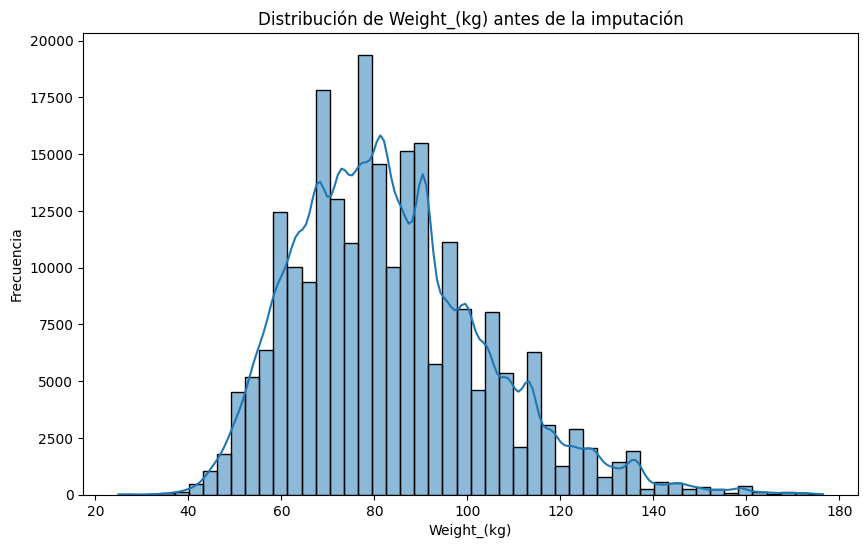

In [ ]:
# Histograma de 'Weight_(kg)'
plt.figure(figsize=(10,6))
sns.histplot(df_missing['Weight_(kg)'], bins=50, kde=True)
plt.title('Distribución de Weight_(kg) antes de la imputación')
plt.xlabel('Weight_(kg)')
plt.ylabel('Frecuencia')
plt.show()

* La distribución de los datos tiene un ligero sesgo hacia la derecha, lo que significa que hay más personas con pesos más bajos en comparación con las personas que tienen un peso más elevado.

* Existe una notable cantidad de valores en los extremos superiores (sobre 120 kg), lo cual sugiere la presencia de outliers.



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


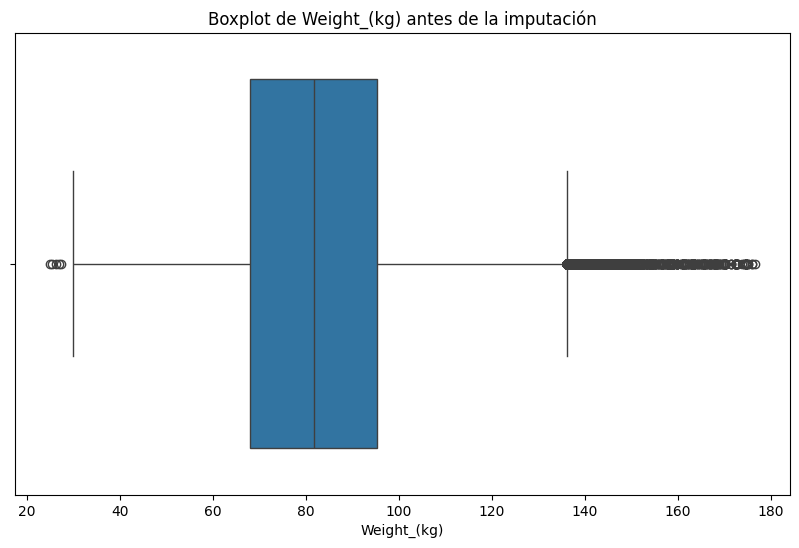

In [ ]:
# Boxplot de 'Weight_(kg)'
plt.figure(figsize=(10,6))
sns.boxplot(x=df_missing['Weight_(kg)'])
plt.title('Boxplot de Weight_(kg) antes de la imputación')
plt.xlabel('Weight_(kg)')
plt.show()

*  confirma la presencia de outliers significativos en el extremo superior (por encima de 120 kg).

* Hay unos pocos outliers en el extremo inferior (debajo de 40 kg), pero no tantos como en el extremo superior.

* La mediana se encuentra cerca de 80 kg

* La mayor parte de los datos se encuentran entre 60 y 100

**Conclusión:**

 Decidimos aplicar la mediana como herramienta de imputación dado que los outliers son significativos en la columna de peso. Debido a que no se ve afectada por los valores atípicos, mientras que la media podría verse sesgada hacia los valores extremadamente altos de peso.

In [ ]:
# Crear el imputador con la estrategia de la mediana
imputer_mediana = SimpleImputer(strategy='median')

# Aplicar la imputación a 'Weight_(kg)'
df_missing['Weight_(kg)'] = imputer_mediana.fit_transform(df_missing[['Weight_(kg)']])

In [ ]:
# Verificar que ya no hay valores faltantes
print("Valores faltantes en 'Weight_(kg)' después de la imputación:")
print(df_missing['Weight_(kg)'].isnull().sum())

Valores faltantes en 'Weight_(kg)' después de la imputación:
0


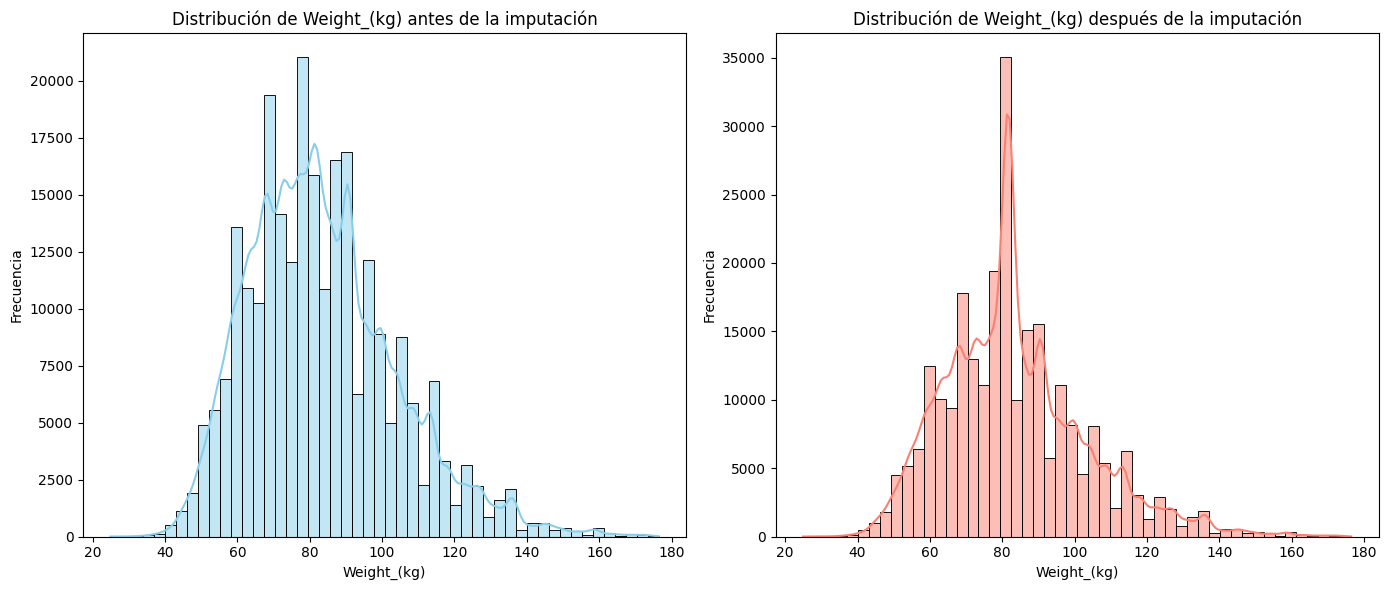

In [ ]:
# Configuración de los gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico del dataset original (antes de la imputación)
sns.histplot(df['Weight_(kg)'], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Weight_(kg) antes de la imputación')
axes[0].set_xlabel('Weight_(kg)')
axes[0].set_ylabel('Frecuencia')

# Gráfico del dataset imputado (después de la imputación)
sns.histplot(df_missing['Weight_(kg)'], bins=50, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribución de Weight_(kg) después de la imputación')
axes[1].set_xlabel('Weight_(kg)')
axes[1].set_ylabel('Frecuencia')

# Ajustar los márgenes entre los gráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Después de la imputación se puede notar un aumento significativo en la frecuencia en torno a los valores cercanos a la mediana (alrededor de 80 kg). Esto es porque la imputación con la mediana introduce un valor constante en todas las observaciones con datos faltantes, reduciendo la dispersión en esa zona. El impacto de la imputación es evidente en el aumento del pico central de la distribución, lo que indica que los valores faltantes fueron reemplazados con la mediana de la distribución original. Como resultado, se pierde un poco de la variabilidad natural que estaba presente en los datos antes de la imputación, pero se logra mantener la estabilidad de la tendencia central.

#### Consumo de fruta

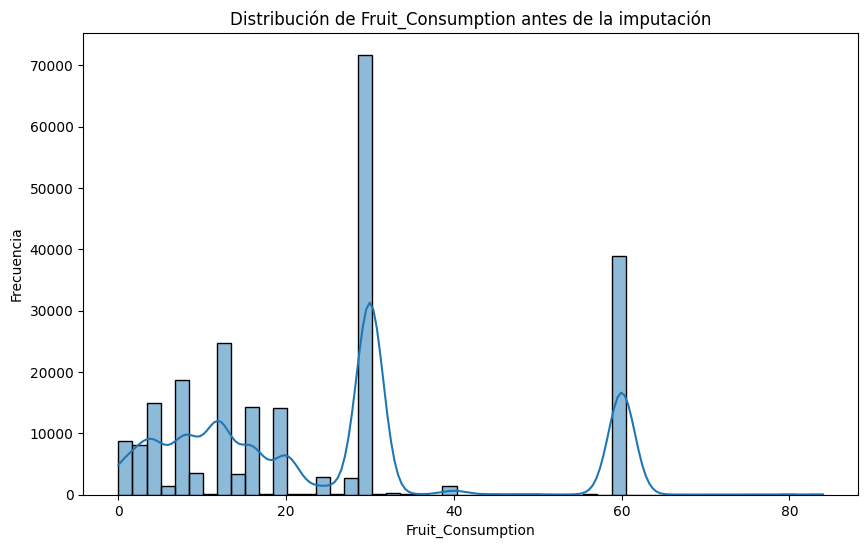

In [ ]:
# Histograma de 'Fruit_Consumption'
plt.figure(figsize=(10,6))
sns.histplot(df_missing['Fruit_Consumption'], bins=50, kde=True)
plt.title('Distribución de Fruit_Consumption antes de la imputación')
plt.xlabel('Fruit_Consumption')
plt.ylabel('Frecuencia')
plt.show()

Graficamos la frecuancia de la característica Fruit Consumption para poder observar la distribución de los datos, basandonos en los resultados podemos afirmar que:

* Muestra una distribución multimodal, con varios picos. Un pico muy pronunciado alrededor de 60 y otro más amplio en 30.

* Parece haber una gran cantidad de outliers en 60.



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


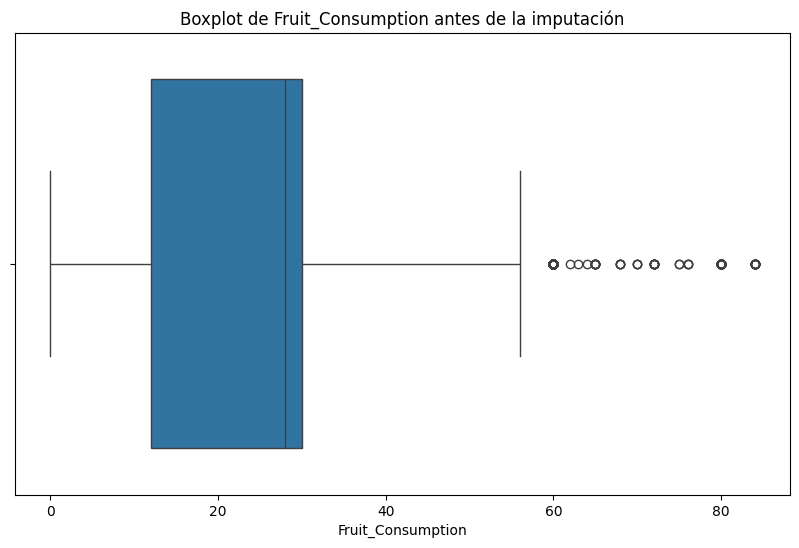

In [ ]:
# Boxplot de 'Fruit_Consumption'
plt.figure(figsize=(10,6))
sns.boxplot(x=df_missing['Fruit_Consumption'])
plt.title('Boxplot de Fruit_Consumption antes de la imputación')
plt.xlabel('Fruit_Consumption')
plt.show()

Ahora, aplicamos un box plot para visualizar los outliers, gracias a esto podemos concluir que:

* Se confirma la presencia de outliers en el extremo superior.

**Conclusión:**

Dado que Fruit_Consumption presenta algunos outliers en los valores altos y una distribución multimodal decidimos emplear la mediana.

In [ ]:
df_mean = df_missing.copy()

In [ ]:
# Aplicar la imputación a 'Fruit_Consumption'
df_missing['Fruit_Consumption'] = imputer_mediana.fit_transform(df_missing[['Fruit_Consumption']])

In [ ]:
# Imputación por media para comparar
imputer_media = SimpleImputer(strategy='mean')
df_mean['Fruit_Consumption'] = imputer_media.fit_transform(df_mean[['Fruit_Consumption']])

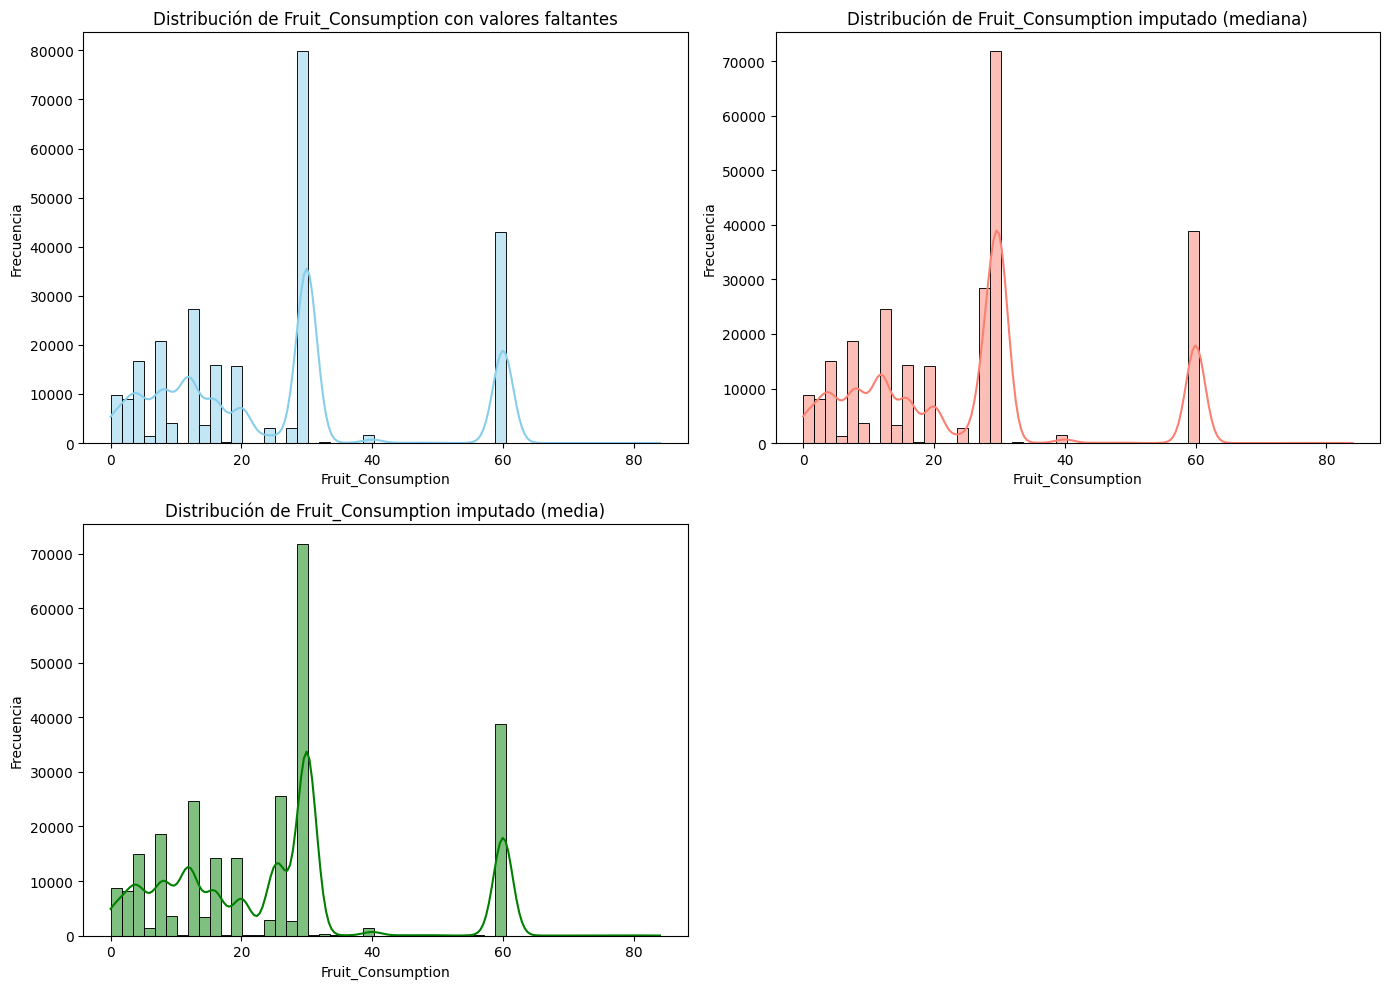

In [ ]:
# Configuración de los gráficos 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico del DataFrame original (df) con valores faltantes
sns.histplot(df['Fruit_Consumption'], bins=50, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución de Fruit_Consumption con valores faltantes')
axes[0, 0].set_xlabel('Fruit_Consumption')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico del DataFrame con imputación por mediana (df_missing)
sns.histplot(df_missing['Fruit_Consumption'], bins=50, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribución de Fruit_Consumption imputado (mediana)')
axes[0, 1].set_xlabel('Fruit_Consumption')
axes[0, 1].set_ylabel('Frecuencia')

# Gráfico del DataFrame con imputación por media (df_mean) en la segunda fila
sns.histplot(df_mean['Fruit_Consumption'], bins=50, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribución de Fruit_Consumption imputado (media)')
axes[1, 0].set_xlabel('Fruit_Consumption')
axes[1, 0].set_ylabel('Frecuencia')

# Ocultar el gráfico que no será usado en la posición [1, 1]
axes[1, 1].axis('off')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Dado que "Fruit_Consumption" presenta una distribución multimodal y contiene outliers, se decidió utilizar la mediana para la imputación de los valores faltantes (gráfica superior derecha). La imputación con la mediana tiene la ventaja de no verse afectada por estos valores extremos, lo cual ayuda a preservar la estabilidad de la tendencia central sin aumentar la influencia de los outliers. Como se puede ver, la distribución resultante mantiene la mayor parte de la estructura de los datos originales, sin alterar significativamente los picos principales.

Adicionalmente, también se aplicó la imputación utilizando la media (gráfica inferior) para fines comparativos. En este caso, el uso de la media resultó en un aumento considerable en torno al valor promedio el cual se ve influenciado por la presencia de outliers.

#### Estado de salud

<ipython-input-38-cb335686ddf3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=health_counts.index, y=health_counts.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

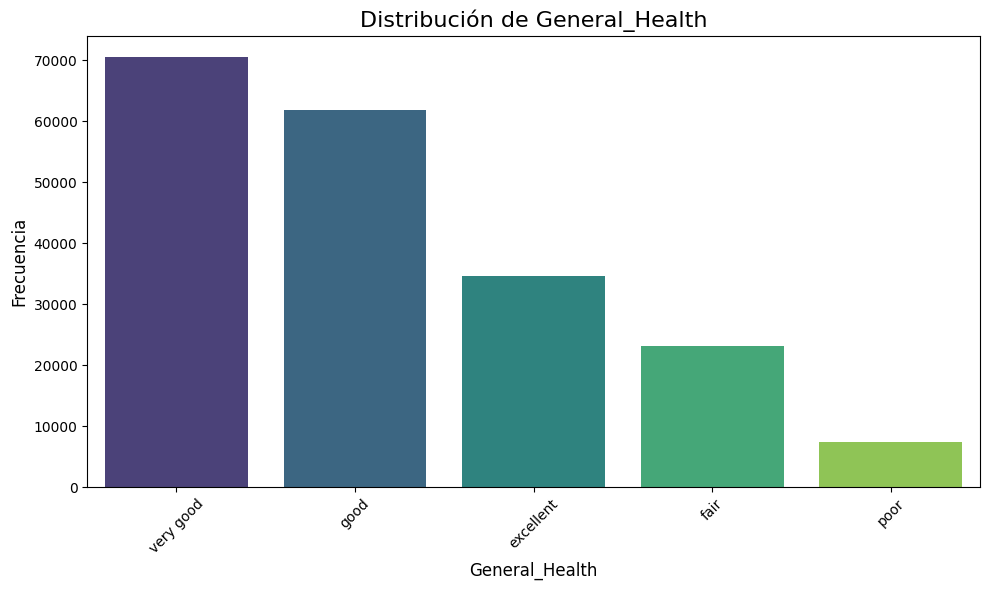

In [ ]:
# Contar la frecuencia de cada categoría en 'General_Health'
health_counts = df_missing['General_Health'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=health_counts.index, y=health_counts.values, palette="viridis")

# Añadir etiquetas y título
plt.title('Distribución de General_Health', fontsize=16)
plt.xlabel('General_Health', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Aqui podemos ver la distribución actual de las clases de General Health, como se muestra en el gráfico la clase mayoritaria es "very good", seguida de "good", con "poor" siendo la clase menos representativa

Debido a que General Health es una variable categórica se explorarán los metodos de imputación con la moda y la imputación aleatoria según la distribución.

In [ ]:
df_moda = df_missing.copy()

**Moda**

Implica reemplazar los valores faltantes con la categoría o valor más frecuente en la variable de interés. En este caso, para la variable "General_Health", se identificará la categoría que ocurre con mayor frecuencia y se utilizará para imputar los valores ausentes. Este enfoque es particularmente útil cuando la variable es categórica y hay una fuerte concentración en una o pocas categorías, ya que permite mantener la consistencia en la distribución general de los datos sin introducir valores poco representativos.

In [ ]:
# Verificar los valores faltantes en 'General_Health' antes de la imputación
print("Valores faltantes en 'General_Health' antes de la imputación:")
print(df_moda['General_Health'].isnull().sum())

Valores faltantes en 'General_Health' antes de la imputación:
58940


In [ ]:
moda_general_health = df_moda['General_Health'].mode()[0]
print(f"La moda de General_Health es: {moda_general_health}")

La moda de General_Health es: very good


In [ ]:
# Imputar los valores faltantes manualmente con la moda
df_moda['General_Health'].fillna(moda_general_health, inplace=True)

# Verificar que ya no hay valores faltantes
print("Valores faltantes en 'General_Health' después de la imputación:")
print(df_moda['General_Health'].isnull().sum())

Valores faltantes en 'General_Health' después de la imputación:
0


<ipython-input-42-c13440ae121e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_moda['General_Health'].fillna(moda_general_health, inplace=True)


**Imputación aleatoria**

En este enfoque de imputación, se busca preservar la distribución original de los datos faltantes seleccionando aleatoriamente valores existentes según sus probabilidades observadas. Para lograr esto, primero se calculan las probabilidades de cada categoría dentro de la variable "General_Health" basándose en la distribución actual. Estas probabilidades se utilizarán para imputar los valores faltantes, manteniendo así la estructura y proporción de cada categoría en el conjunto de datos original.

In [ ]:
import numpy as np

# Calcular las probabilidades de cada categoría según la distribución actual
probabilities = df_missing['General_Health'].value_counts(normalize=True)
probabilities

General_Health
very good    0.357355
good         0.313300
excellent    0.175140
fair         0.117083
poor         0.037122
Name: proportion, dtype: float64

In [ ]:
# Imputar los valores faltantes de forma aleatoria según la distribución original
df_missing['General_Health'] = df_missing['General_Health'].apply(lambda x: np.random.choice(probabilities.index, p=probabilities.values) if pd.isnull(x) else x)

In [ ]:
print("Valores faltantes en 'General_Health' después de la imputación:")
print(df_missing['General_Health'].isnull().sum())

Valores faltantes en 'General_Health' después de la imputación:
0


**Comparación**

<ipython-input-46-2ff5d17ed60d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['General_Health'].value_counts().index,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list

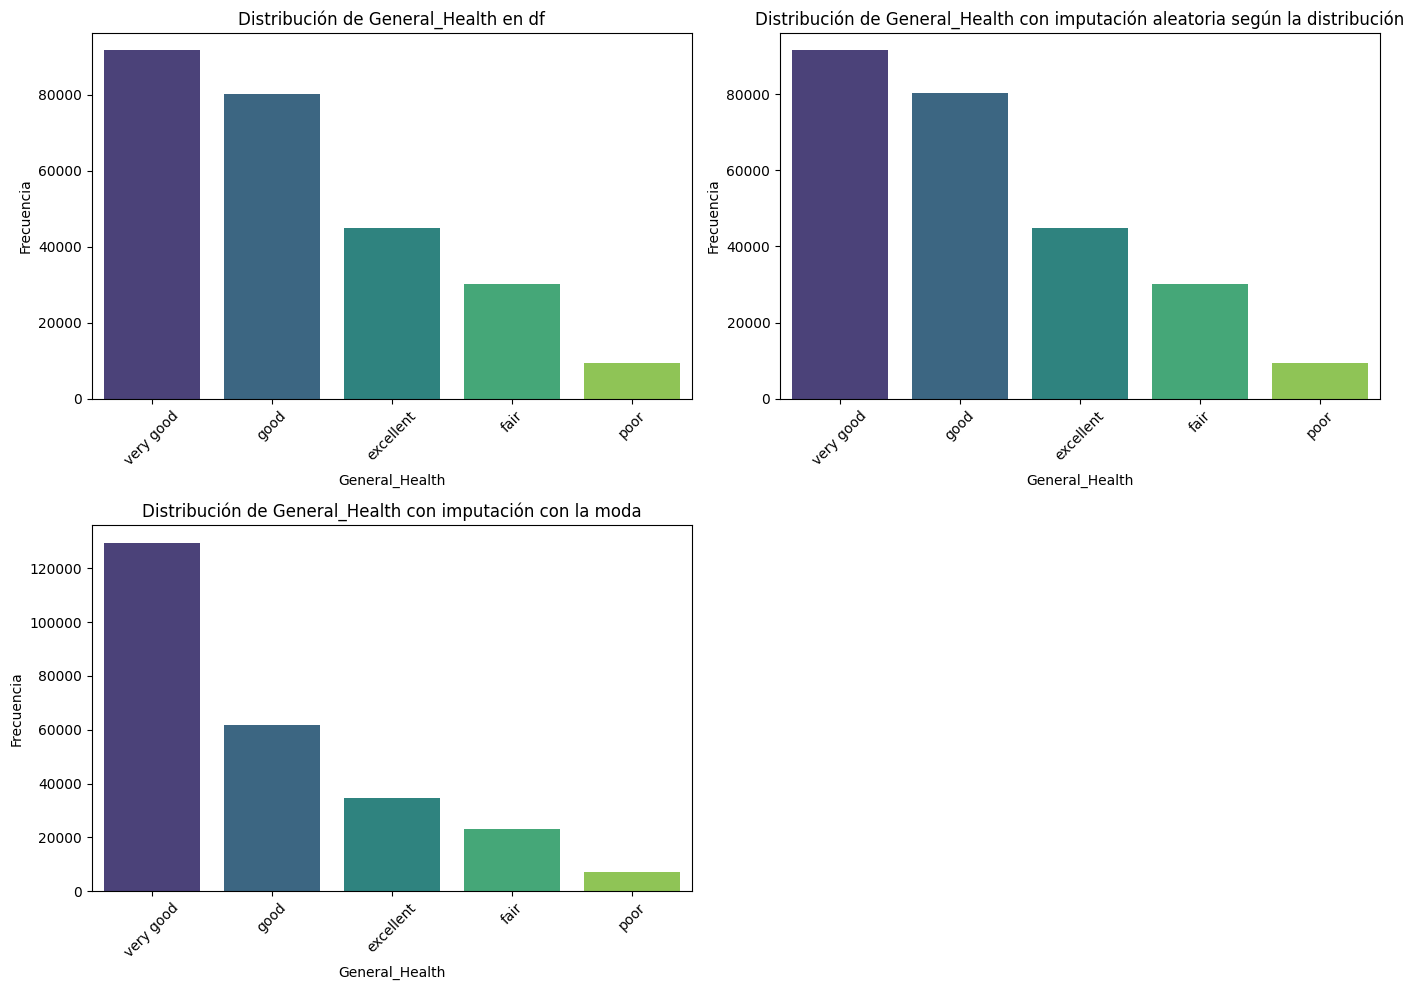

In [ ]:
# Configuración de la figura 2x2, dejando un espacio vacío
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#Gráfico de barras para 'General_Health' en df (DataFrame original)
sns.barplot(x=df['General_Health'].value_counts().index,
            y=df['General_Health'].value_counts().values, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Distribución de General_Health en df')
axes[0, 0].set_xlabel('General_Health')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].tick_params(axis='x', rotation=45)

#Gráfico de barras para 'General_Health' en df_missing (DataFrame con imputación aleatoria según la distribución)
sns.barplot(x=df_missing['General_Health'].value_counts().index,
            y=df_missing['General_Health'].value_counts().values, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribución de General_Health con imputación aleatoria según la distribución')
axes[0, 1].set_xlabel('General_Health')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].tick_params(axis='x', rotation=45)

#Gráfico de barras para 'General_Health' en df_moda (DataFrame con valores imputados con la moda)
sns.barplot(x=df_moda['General_Health'].value_counts().index,
            y=df_moda['General_Health'].value_counts().values, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Distribución de General_Health con imputación con la moda')
axes[1, 0].set_xlabel('General_Health')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Espacio vacío (no se necesita gráfico aquí)
axes[1, 1].axis('off')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Aqui se puede observar inicialmente que mientras que la imputación aleatoria mantiene una distribución proporcional al dataframe original y una frecuencia similar en sus distintas clases, la frecuencia evidenciada en la clase mayoritaría de la grafica de la moda mostró un incremento enorme, llegando a tener una frecuencia de más del doble de la segunda clase más grande.

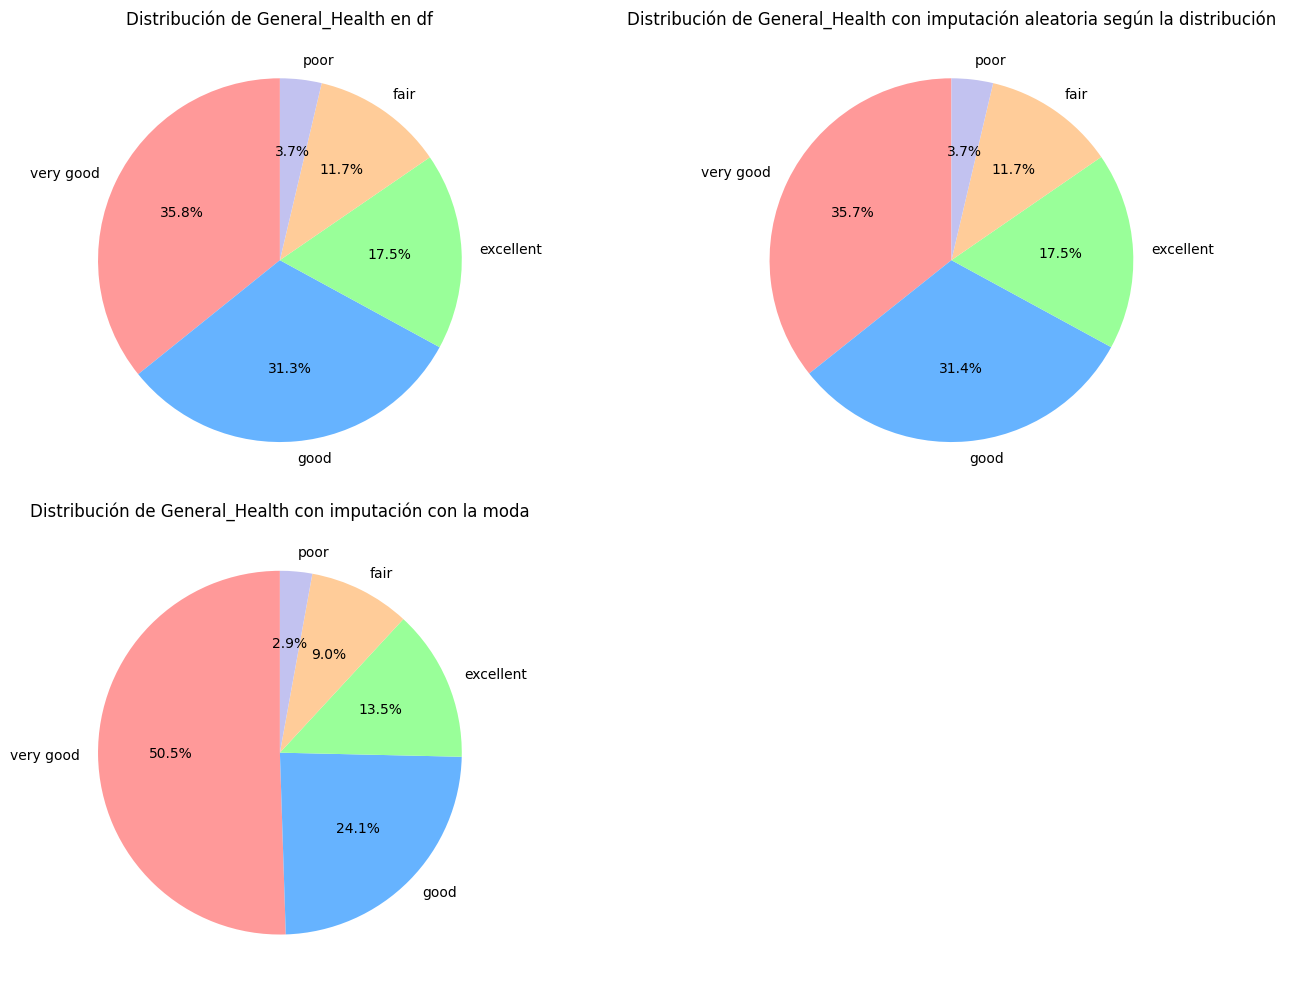

In [ ]:
# Definir una paleta de colores consistente para los gráficos de pastel
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# Crear la figura y los subplots 2x2 (dejar uno vacío)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#Pie chart para df (DataFrame original)
axes[0, 0].pie(df['General_Health'].value_counts(),
               labels=df['General_Health'].value_counts().index,
               autopct='%1.1f%%', startangle=90, colors=colors)
axes[0, 0].set_title('Distribución de General_Health en df')

#Pie chart para 'General_Health' en df_missing (DataFrame con imputación aleatoria según la distribución)
axes[0, 1].pie(df_missing['General_Health'].value_counts(),
               labels=df_missing['General_Health'].value_counts().index,
               autopct='%1.1f%%', startangle=90, colors=colors)
axes[0, 1].set_title('Distribución de General_Health con imputación aleatoria según la distribución')

#Pie chart para 'General_Health' en df_moda (DataFrame con valores imputados con la moda)
axes[1, 0].pie(df_moda['General_Health'].value_counts(),
               labels=df_moda['General_Health'].value_counts().index,
               autopct='%1.1f%%', startangle=90, colors=colors)
axes[1, 0].set_title('Distribución de General_Health con imputación con la moda')

# 4. Espacio vacío (sin gráfico)
axes[1, 1].axis('off')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


En la gráfica superior derecha, se muestra la distribución resultante después de aplicar la imputación aleatoria basada en la distribución existente. Como se puede ver, las proporciones se mantienen muy similares a las del conjunto de datos original, ya que los valores faltantes se imputaron utilizando probabilidades basadas en la frecuencia de cada categoría, manteniendo así la estructura general de los datos.

Por otro lado, en la gráfica inferior se presenta la distribución después de imputar los valores faltantes utilizando la moda. En este caso, "very good", que es la categoría más frecuente, muestra un aumento significativo en su proporción, pasando del 35.8% al 50.5%. Esto es un resultado esperado de la imputación con la moda, ya que todos los valores faltantes son reemplazados por la categoría más común, lo cual puede distorsionar la representación general de las otras categorías, especialmente si hay una gran cantidad de datos faltantes.

**Moda**
* Es simple y efectiva si se desea imputar los valores faltantes con el valor más frecuente, que es "Very Good". Pero se altera la distribución de los datos.

**Imputación aleatoria según la distribución**
* Mantiene mejor la distribución original de las categorías y puede ser más adecuada si quieres evitar sesgos hacia la categoría más frecuente.

## **Visualización de los datos**

##Histograma

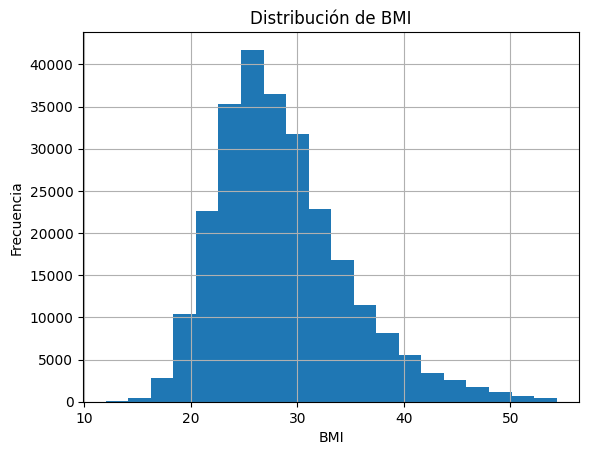

In [ ]:
import matplotlib.pyplot as plt

# Histograma para la variable 'BMI'
df['BMI'].hist(bins=20)
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('Distribución de BMI')
plt.show()


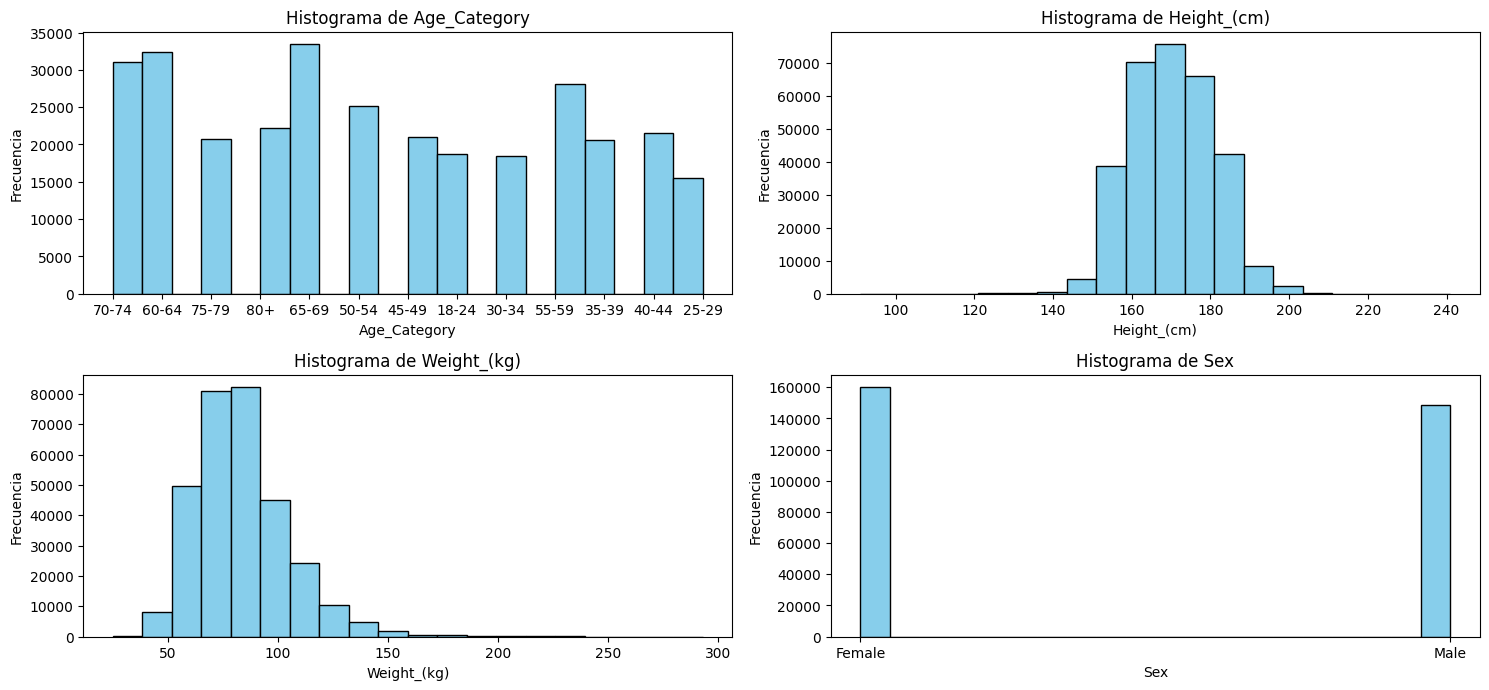

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('CVD_cleaned.csv')

# Definir las columnas a graficar
columns_to_plot = ['Age_Category', 'Height_(cm)', 'Weight_(kg)', 'Sex']

# Crear una figura para los histogramas
plt.figure(figsize=(15, 10))

# Crear histogramas para cada variable en las columnas especificadas
for i, column in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot) // 2 + 1, 2, i + 1)
    plt.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()


##Promedio

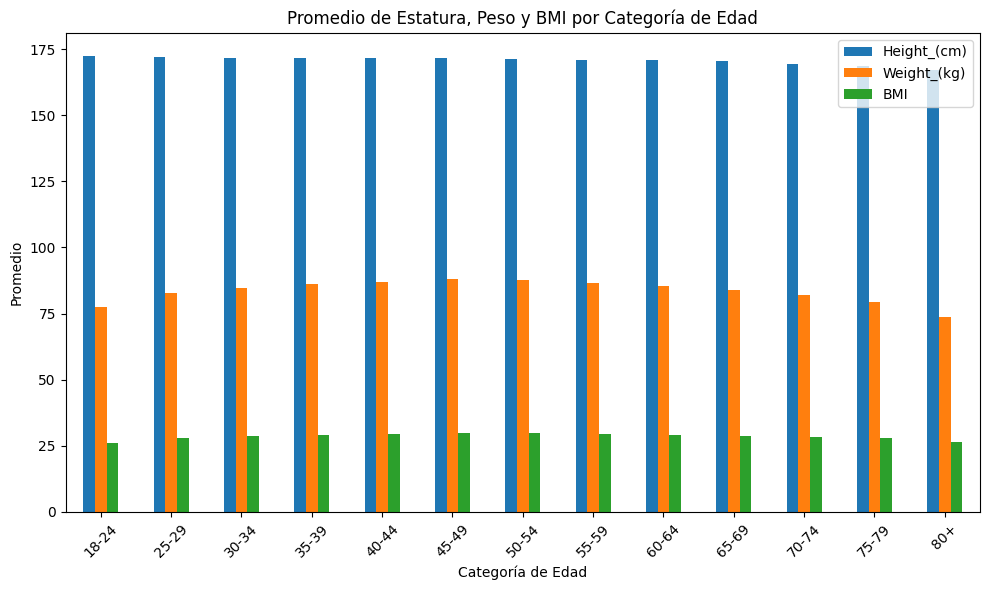

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('CVD_cleaned.csv')

# Agrupar por 'Age_Category' y calcular el promedio de 'Height_(cm)', 'Weight_(kg)' y 'BMI'
grouped_data = df.groupby('Age_Category')[['Height_(cm)', 'Weight_(kg)', 'BMI']].mean()

# Crear la gráfica
grouped_data.plot(kind='bar', figsize=(10, 6))

# Añadir título y etiquetas
plt.title('Promedio de Estatura, Peso y BMI por Categoría de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Promedio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad

# Mostrar gráfica
plt.tight_layout()
plt.show()


***Descripción general de la gráfica:***

El eje X contiene las categorías de edad
El eje Y representa el promedio de las variables Height_(cm), Weight_(kg), y BMI.
Hay tres barras para cada categoría de edad:
Azul: Promedio de la estatura en centímetros.
Naranja: Promedio del peso en kilogramos.
Verde: Promedio del índice de masa corporal (BMI).

***Insights obtenidos:***


1. Se observa que la estatura promedio (barras azules) es bastante constante en todas las categorías de edad. Esto sugiere que, en promedio, la estatura de las personas no cambia significativamente con la edad, lo cual es esperable, ya que la estatura tiende a estabilizarse después de la adolescencia.
Sin embargo, a medida que nos acercamos a las categorías de mayor edad (por ejemplo, 80+), la estatura promedio parece disminuir levemente. Esto podría ser un reflejo de la pérdida de masa ósea y cambios físicos en adultos mayores.
Variación en el peso promedio:

2. El peso promedio (barras naranjas) sigue una tendencia ascendente hasta las categorías de edad media (40-49 años), y después parece mantenerse relativamente constante o disminuir ligeramente en las categorías de edad más avanzadas (65+).
Esto es devido a que las personas tienden a aumentar de peso hasta llegar a la mediana edad y luego estabilizarse o perder peso en la vejez, lo cual podría estar asociado con cambios metabólicos, de salud o de estilo de vida.

3. El BMI promedio (barras verdes) sigue un patrón similar al del peso, con un aumento gradual a medida que aumenta la edad hasta la mediana edad (40-49 años) y luego una ligera disminución en las categorías de mayor edad (80+):

4. En la categoría de 80+ años, hay una disminución en los tres indicadores: estatura, peso, y BMI. Esto podría reflejar los cambios físicos significativos que ocurren en las personas mayores, como la pérdida de masa muscular, pérdida de masa ósea, y cambios metabólicos, lo que puede afectar tanto el peso como la estatura.

***Conclusiones y reflexiones:***

La estatura se mantiene relativamente constante a lo largo de la vida adulta, mientras que el peso y el BMI tienden a aumentar hasta alcanzar su punto máximo en la mediana edad, para luego disminuir en las personas de mayor edad.


## Heat Maps

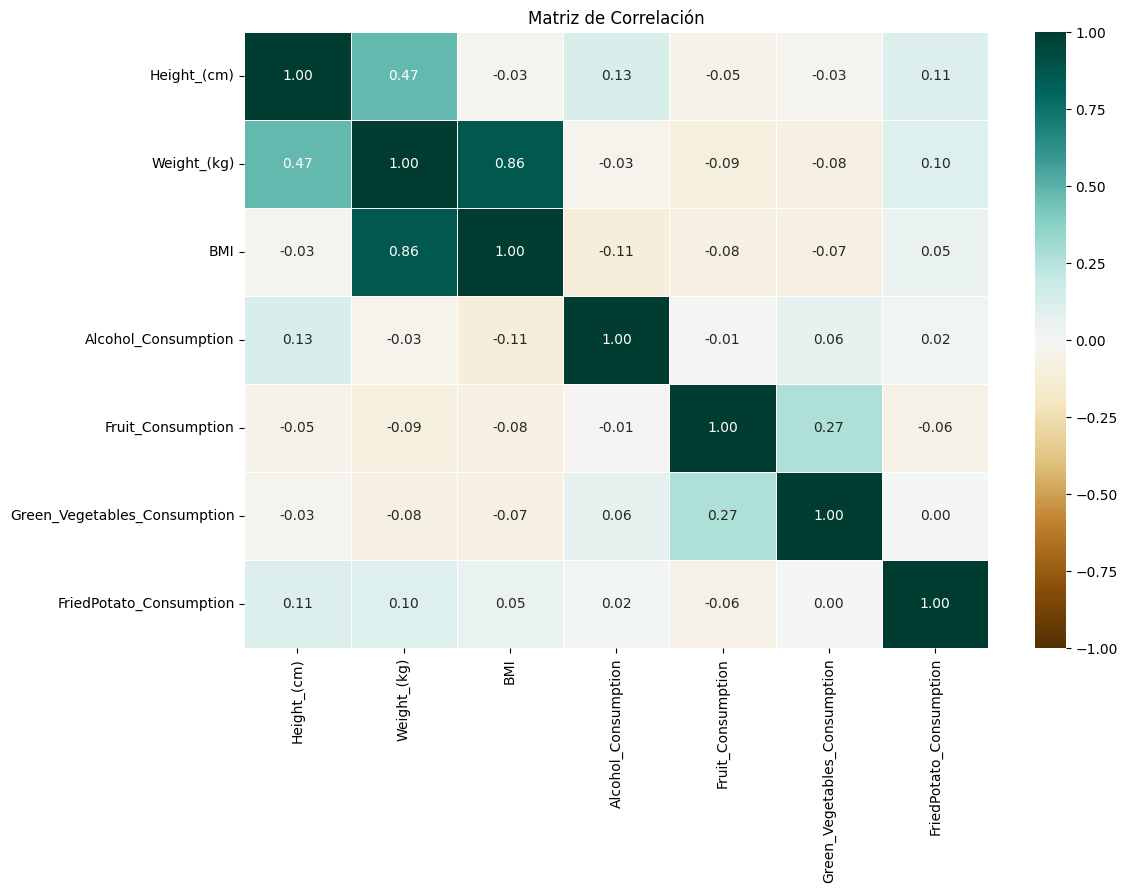

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('CVD_cleaned.csv')

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[float, int])

# Crear una figura para el heatmap
plt.figure(figsize=(12, 8))

# Calcular la matriz de correlación
c = numeric_df.corr()

# Crear el heatmap
sns.heatmap(c, cmap="BrBG", annot=True, fmt='.2f', linewidths=.5, vmin=-1, vmax=1)

# Mostrar la gráfica
plt.title('Matriz de Correlación')
plt.show()

***Matriz de correlación:***

* 1 indica una correlación positiva perfecta (cuando una variable aumenta, la otra también lo hace en la misma proporción).
* 0 indica que no hay correlación entre las variables.
* -1 indica una correlación negativa perfecta (cuando una variable aumenta, la otra disminuye en la misma proporción).

***Insights:***

1. Relación entre Peso y BMI: Hay una fuerte correlación positiva (0.86) entre el peso (Weight) y el índice de masa corporal (BMI). Esto indica que a medida que aumenta el peso, también lo hace el BMI.
2. Consumo de Frutas y BMI: Existe una correlación negativa moderada (-0.50) entre el consumo de frutas (Fruit Consumption) y el BMI. Esto sugiere que un mayor consumo de frutas está asociado con un menor BMI.
3. Altura y Peso: La correlación entre la altura (Height) y el peso (Weight) es positiva (0.47), lo que indica que las personas más altas tienden a pesar más.
4. Consumo de Verduras y Frutas: Hay una correlación positiva (0.27) entre el consumo de verduras (Green Vegetables Consumption) y el consumo de frutas, lo que podría indicar que las personas que consumen más frutas también tienden a consumir más verduras.

##Gráfico de Barras

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Cargar el dataset
df = pd.read_csv('CVD_cleaned.csv')

# Definir las columnas a graficar
columns_to_plot = ['General_Health', 'Age_Category', 'Height_(cm)', 'Checkup', 'Diabetes', 'Age_Category', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Crear gráfico de barras para cada columna
for column in columns_to_plot:
    # Calcular la frecuencia de cada valor único en la columna
    values = df[column].value_counts().sort_index()

    # Crear gráfico de barras
    fig = go.Figure(data=[go.Bar(x=values.index, y=values.values)])

    # Añadir título y etiquetas
    fig.update_layout(
        title=f'Gráfico de Barras para {column}',
        xaxis_title=column,
        yaxis_title='Frecuencia'
    )

    # Mostrar gráfico
    fig.show()

#Gráfico de pastel

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Cargar el dataset
df = pd.read_csv('CVD_cleaned.csv')

# Definir las columnas a graficar
columns_to_plot = [ 'Exercise', 'Heart_Disease',
                   'Skin_Cancer', 'Other_Cancer', 'Depression',
                   'Arthritis', 'Sex', 'Smoking_History']

# Crear gráficos de pastel para cada columna
for column in columns_to_plot:
    # Calcular la frecuencia de cada valor único en la columna
    values = df[column].value_counts()
    labels = values.index
    sizes = values.values

    # Crear gráfico de pastel
    fig = go.Figure(data=[go.Pie(labels=labels, values=sizes)])

    # Añadir título
    fig.update_layout(title=f'Gráfico de Pastel para {column}')

    # Mostrar gráfico
    fig.show()


##Gráfico de Dispersión

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Cargar el dataset
df = pd.read_csv('CVD_cleaned.csv')

# Seleccionar las variables para el gráfico
x = df['Height_(cm)']
y = df['Weight_(kg)']
color = df['BMI']  # Usar 'BMI' para el color de los puntos

# Crear gráfico de dispersión
fig = go.Figure(data=go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size=12,
        color=color,  # Color de los puntos basado en 'BMI'
        colorscale='Viridis',  # Escala de colores
        showscale=True  # Mostrar la barra de escala de colores
    )
))

# Añadir título y etiquetas
fig.update_layout(
    title='Gráfico de Dispersión',
    xaxis_title='Height (cm)',
    yaxis_title='Weight (kg)'
)

# Mostrar gráfico
fig.show()


***Insights:***

* El gráfico permite observar visualmente si existe una correlación entre la altura y el peso. Por lo general, se esperaría que personas más altas pesen más, pero la dispersión de los puntos puede mostrar qué tan fuerte es esa relación.
* Puntos con colores en la parte inferior del espectro (colores fríos) representan individuos con un BMI más bajo, lo que puede significar que están en un rango de peso saludable o por debajo del peso promedio.
* Puntos con colores más cálidos (amarillos) indican personas con un BMI más alto, lo que sugiere que están en categorías de sobrepeso u obesidad.

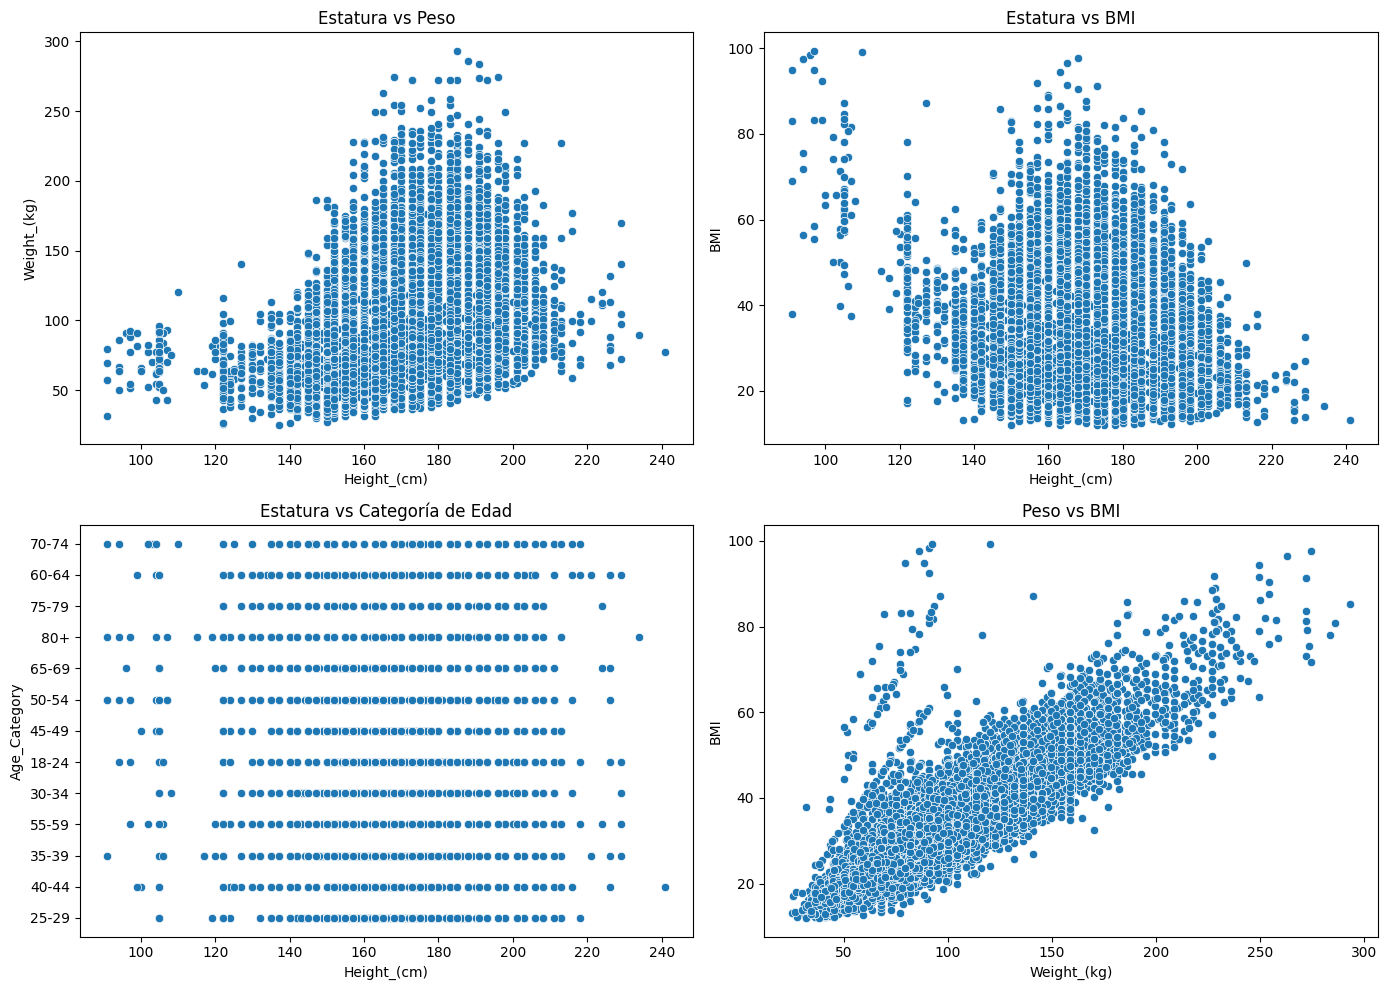

In [ ]:
import seaborn as sns

# Crear una figura con varios subplots
plt.figure(figsize=(14, 10))

# Graficar diferentes pares de variables
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['Height_(cm)'], y=df['Weight_(kg)'])
plt.title('Estatura vs Peso')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df['Height_(cm)'], y=df['BMI'])
plt.title('Estatura vs BMI')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df['Height_(cm)'], y=df['Age_Category'])
plt.title('Estatura vs Categoría de Edad')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df['Weight_(kg)'], y=df['BMI'])
plt.title('Peso vs BMI')

# Ajustar el diseño
plt.tight_layout()
plt.show()

***Insights:***

1. **Estatura vs Peso**
  * Este gráfico muestra la relación entre la estatura y el peso. Generalmente, se espera que exista una correlación positiva entre estas dos variables, es decir, que las personas más altas tienden a tener un mayor peso, sin embargo, aunque hay una tendencia general, hay personas más bajas que pesan más de lo esperado y personas altas que pesan menos de lo esperado.
  * Anomalías o valores atípicos (outliers) pueden detectarse si hay puntos aislados fuera de la nube principal de datos, lo cual podría requerir análisis adicional.

2.  **Estatura vs BMI **
  * En este gráfico se examina cómo varía el BMI en función de la estatura. A primera vista, podrías esperar que el BMI esté distribuido de manera más uniforme, sin embargo, observamos una tendencia en la gráfica, como un grupo de individuos altos tienen BMI alto, eso podría indicar que las personas más altas tienen más probabilidad de tener un mayor peso en relación con su altura.
3. **Estatura vs Categoría de Edad**
  * Este gráfico ilustra cómo varía la estatura entre diferentes grupos de edad. Las categorías de edad son datos discretos, por lo que los puntos estarán distribuidos en líneas horizontales.
4. **Peso vs BMI**
  * Aquí, se visualiza la relación entre el peso y el BMI. Como el BMI está directamente relacionado con el peso (y la estatura), tiene una correlación positiva.
  *  El gráfico muestra una tendencia creciente de manera vertical, esto indica que la estatura también juega un papel importante en el cálculo del BMI.


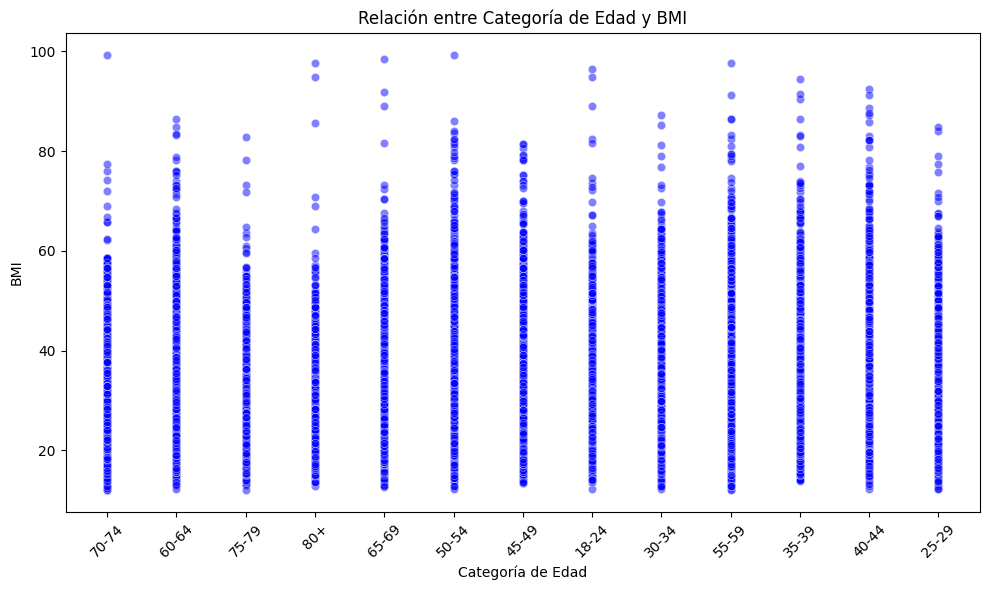

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('CVD_cleaned.csv')

# Crear la figura
plt.figure(figsize=(10, 6))

# Crear el scatter plot usando Age_Category como categórica
sns.scatterplot(x='Age_Category', y='BMI', data=df, color='blue', alpha=0.5)

# Agregar título y etiquetas
plt.title('Relación entre Categoría de Edad y BMI')
plt.xlabel('Categoría de Edad')
plt.ylabel('BMI')

# Ajustar la estética del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas de las categorías de edad si es necesario
plt.tight_layout()

# Mostrar la gráfica
plt.show()


**Insights:**

Las personas en las categorías de edad más jóvenes tienden a tener un BMI más bajo, mientras que las personas en categorías de edad mayores pueden mostrar una tendencia a tener un BMI más alto.
Esta tendencia podría estar relacionada con factores de estilo de vida, metabolismo, o cambios en la composición corporal que ocurren con la edad.

## Referencias


1.   Lupague, R.M. et al. (2023) ‘Integrated Machine Learning Model for
Comprehensive Heart Disease Risk Assessment based on multi-dimensional health factors’, European Journal of Computer Science and Information Technology, 11(3), pp. 44–58. doi:10.37745/ejcsit.2013/vol11n34458.

2.  Organización Mundial de la Salud (OMS). (2021). Cardiovascular diseases (CVDs). Recuperado de https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

3. Lloyd-Jones, D. M., Hong, Y., Labarthe, D., Mozaffarian, D., Appel, L. J., Van Horn, L., ... & Rosamond, W. D. (2010). Defining and setting national goals for cardiovascular health promotion and disease reduction: The American Heart Association's strategic impact goal through 2020 and beyond. Circulation, 121(4), 586-613. doi:10.1161/CIRCULATIONAHA.109.192703

4. D'Agostino, R. B., Vasan, R. S., Pencina, M. J., Wolf, P. A., Cobain, M., Massaro, J. M., & Kannel, W. B. (2008). General cardiovascular risk profile for use in primary care: The Framingham Heart Study. Circulation, 117(6), 743-753. doi:10.1161/CIRCULATIONAHA.107.699579

5. Rawshani, A., Rawshani, A., Franzén, S., Eliasson, B., Svensson, A. M., Miftaraj, M., ... & Gudbjörnsdottir, S. (2017). Mortality and cardiovascular disease in type 1 and type 2 diabetes. The New England Journal of Medicine, 376(15), 1407-1418. doi:10.1056/NEJMoa1608664

6. Bishop, C. M. (2006). Pattern recognition and machine learning. Springer.

7. Esteva, A., Kuprel, B., Novoa, R. A., Ko, J., Swetter, S. M., Blau, H. M., & Thrun, S. (2017). Dermatologist-level classification of skin cancer with deep neural networks. Nature, 542(7639), 115-118.

8. Lundberg, S. M., & Lee, S. I. (2017). A unified approach to interpreting model predictions. In Advances in Neural Information Processing Systems (pp. 4765-4774).
9. IBM Watson Health. (2018). Artificial Intelligence in Healthcare: Predicting Disease and Preventing Its Progression. Recuperado de https://www.ibm.com/blogs/watson-health/artificial-intelligence-predicting-disease-preventing-its-progression/
10. Cardiac disease prediction using AI algorithms with SelectKBest. Recuperado de: https://pubmed.ncbi.nlm.nih.gov/37679578/


